Credit Card Fraud Detection Project

Introduction

This project focuses on developing a credit card fraud detection system using machine learning techniques. As digital payments increase, so does the risk of fraud, making effective detection methods essential. We will generate a synthetic dataset simulating credit card transactions, preprocess the data, train various machine learning models, and evaluate their performance. Additionally, we will address issues related to overfitting, underfitting, and model convergence.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    10000 non-null  int32         
 1   amount            10000 non-null  float64       
 2   transaction_date  10000 non-null  datetime64[ns]
 3   merchant          10000 non-null  object        
 4   cardholder_id     10000 non-null  int32         
 5   transaction_type  10000 non-null  object        
 6   location          10000 non-null  object        
 7   is_fraud          10000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 507.9+ KB
None

First 5 rows of the dataset:
   transaction_id   amount    transaction_date merchant  cardholder_id  \
0               1  1873.33 2023-01-01 00:00:00  Store C           1923   
1               2  4753.62 2023-01-01 01:00:00  Store D           127

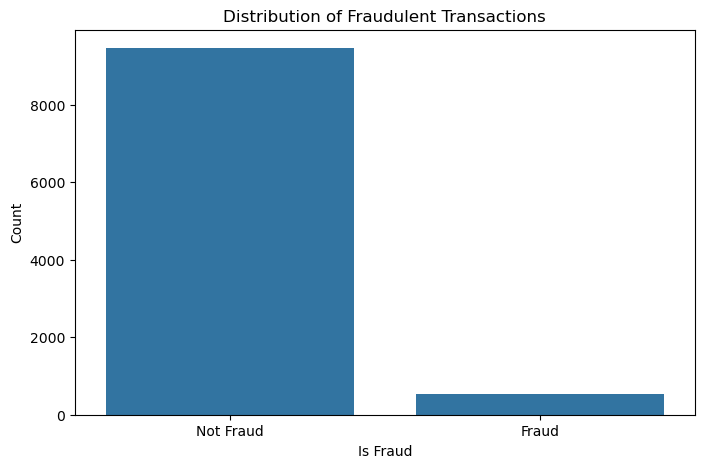

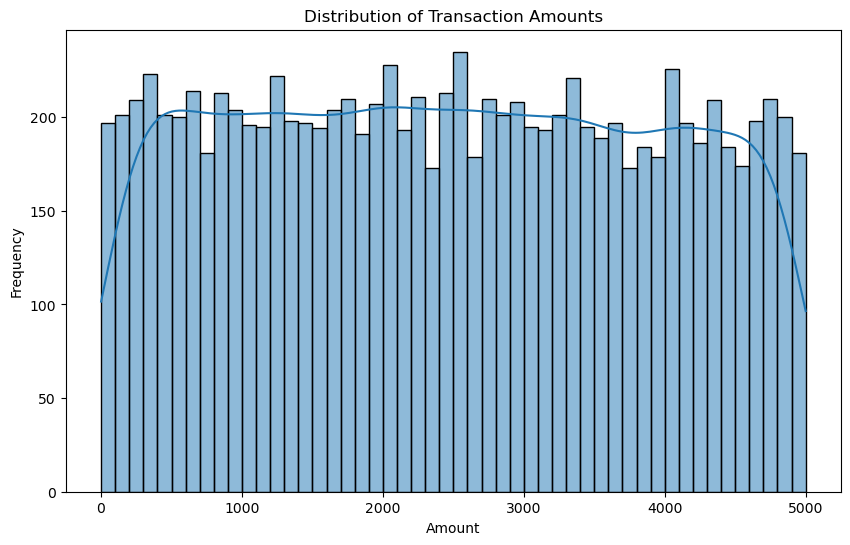

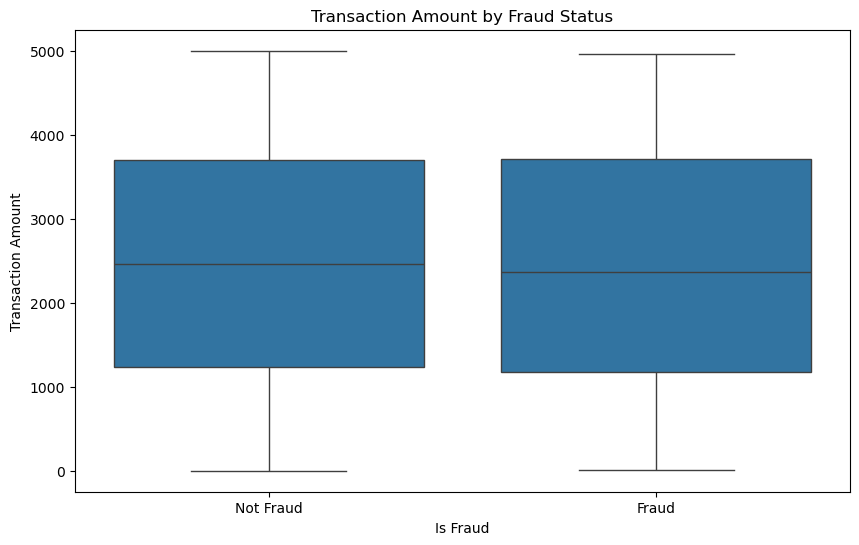

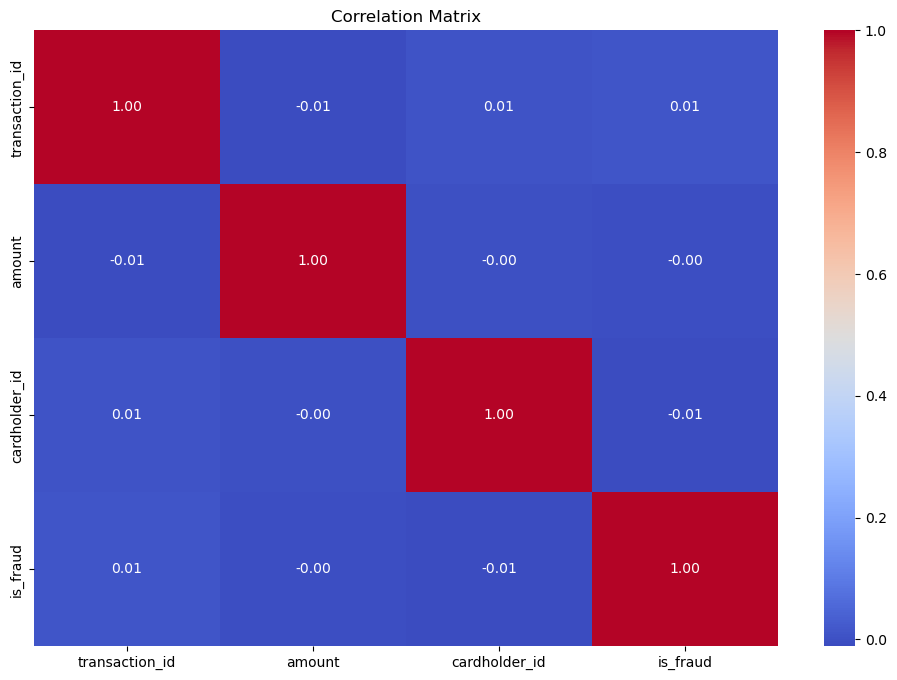

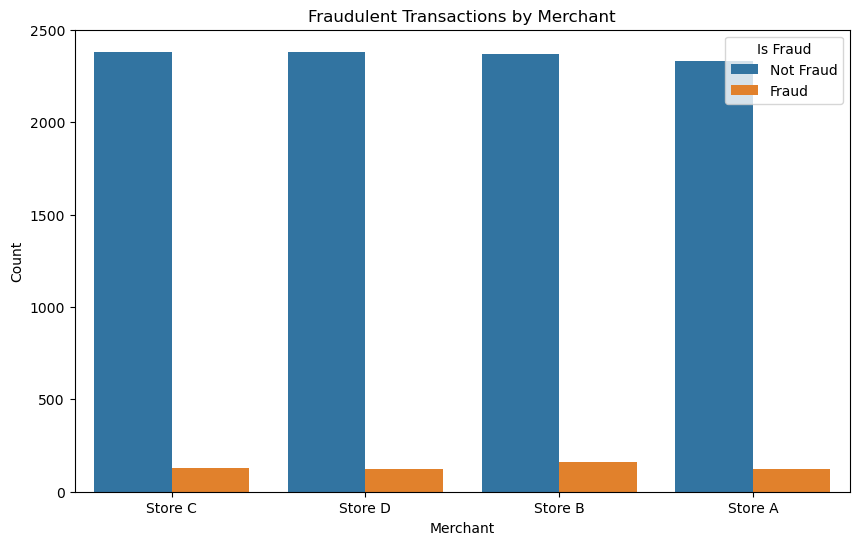

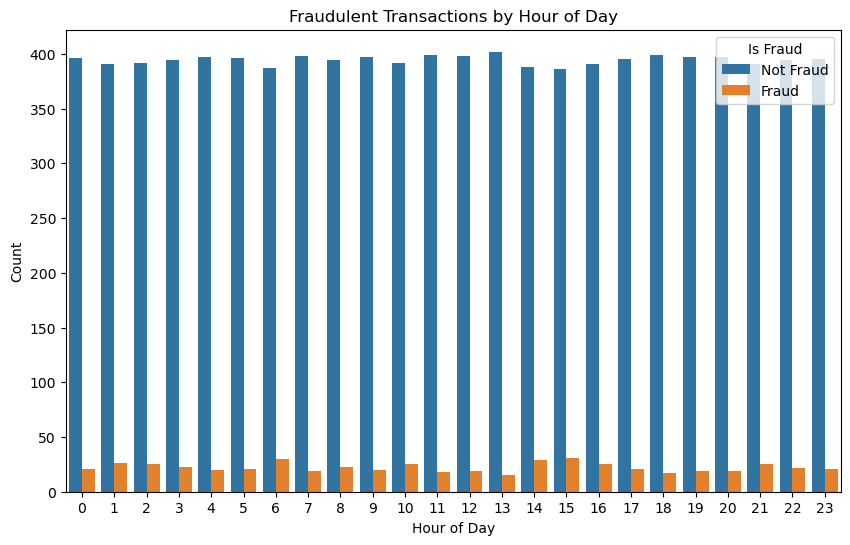

Logistic Regression Accuracy: 0.9480
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1896
           1       0.00      0.00      0.00       104

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.92      2000

Random Forest Accuracy: 0.9470
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1896
           1       0.00      0.00      0.00       104

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.92      2000


Best Model: Logistic Regression with Accuracy: 0.9480


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Data Generation
np.random.seed(42)
n_samples = 10000

# Generate synthetic credit card transaction data
data = {
    'transaction_id': np.arange(1, n_samples + 1),
    'amount': np.round(np.random.uniform(1, 5000, n_samples), 2),
    'transaction_date': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),
    'merchant': np.random.choice(['Store A', 'Store B', 'Store C', 'Store D'], n_samples),
    'cardholder_id': np.random.randint(1000, 2000, n_samples),
    'transaction_type': np.random.choice(['Purchase', 'Cash Withdrawal', 'Transfer'], n_samples),
    'location': np.random.choice(['Location A', 'Location B', 'Location C'], n_samples),
    'is_fraud': np.random.choice([0, 1], n_samples, p=[0.95, 0.05])  # 5% fraud
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Data Overview
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 3: Checking for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 4: Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Step 5: EDA

# Distribution of Target Variable (is_fraud)
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Distribution of Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Relationship between Transaction Amount and Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Correlation Matrix
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analyzing Fraud by Merchant
plt.figure(figsize=(10, 6))
sns.countplot(x='merchant', hue='is_fraud', data=df)
plt.title('Fraudulent Transactions by Merchant')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()

# Time-based Analysis
df['hour'] = df['transaction_date'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='is_fraud', data=df)
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()

# Step 6: Data Cleaning and Preprocessing
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df = pd.get_dummies(df, columns=['merchant', 'transaction_type', 'location'], drop_first=True)

X = df.drop(columns=['transaction_id', 'transaction_date', 'is_fraud'])
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Model Training and Evaluation
# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, solver='saga', C=0.5),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store accuracy results
accuracy_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Fit on scaled data
    y_pred = model.predict(X_test_scaled)  # Predict on scaled data
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

# Find the best model based on accuracy
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model_accuracy = accuracy_results[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Summary of the Credit Card Fraud Detection Project 

This project focuses on detecting fraudulent credit card transactions using a synthetic dataset. It includes data generation, exploratory data analysis (EDA), data cleaning, and machine learning model training and evaluation.


1. Data Generation
   
A synthetic dataset with 10,000 samples is created, containing features like transaction amount, date, merchant, cardholder ID, transaction type, location, and a binary target variable indicating whether a transaction is fraudulent.
The target variable is imbalanced, with 5% of transactions labeled as fraudulent.

2. Data Overview

An overview of the dataset is provided, including its structure and the first few rows.
Missing values are checked to ensure data integrity.

3. Data Cleaning

Datetime Conversion: The transaction_date column is converted to a datetime format for time-based analysis.
Dummy Encoding: Categorical features such as merchant, transaction type, and location are converted into dummy variables to make them suitable for machine learning algorithms.
Feature Selection: Unnecessary columns, like transaction ID and the original date, are dropped from the dataset, focusing only on relevant features for model training.

4. Exploratory Data Analysis (EDA)

Distribution of Fraudulent Transactions: A count plot visualizes the balance of fraudulent vs. non-fraudulent transactions.
Transaction Amounts: A histogram and box plot illustrate the distribution of transaction amounts, highlighting differences between fraudulent and non-fraudulent transactions.

Correlation Matrix: Only numeric features are considered to identify relationships between them.
Merchant Analysis: A count plot shows the number of fraudulent transactions by merchant, providing insight into potentially risky merchants.
Time-Based Analysis: The distribution of fraud by the hour of day is analyzed to identify any patterns in fraudulent activity.

5. Data Preprocessing
   
The cleaned dataset is split into training and testing sets to prepare for model training.

6. Feature Scaling
   
Features are standardized using StandardScaler to improve the performance of the models.

7. Model Training and Evaluation
   
Two machine learning models are implemented: Logistic Regression and Random Forest.

Each model is trained on the scaled training data, and predictions are made on the test set.
The accuracy and classification reports are generated for both models, providing metrics like precision, recall, and F1-score.

8. Best Model Identification

The model with the highest accuracy is identified, helping to determine the most effective approach for fraud detection based on the synthetic dataset.

Conclusion

This project provides a comprehensive approach to fraud detection in credit card transactions, utilizing synthetic data for demonstration. The inclusion of data cleaning steps is crucial to ensure the integrity and usability of the dataset. By combining EDA and machine learning, the project highlights the importance of understanding data and preparing it adequately before model implementation.

Insights gained from EDA can inform feature selection and model choice, ultimately leading to more effective fraud detection systems. This methodology can be applied to real-world datasets, allowing for adaptations to improve the robustness and accuracy of fraud detection models.